<a href="https://colab.research.google.com/github/NoahGV/persona/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 1**: Diseño, Entrenamiento y Test de un Sistema de Redes Neuronas Artificiales.

Creamos un modelo de Red de Neuronas Artificiales que sea capaz de reconocer clasificar imágenes de ropa en sus diferentes tipologías.

Este modelo será definido, configurado,  entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

La clasificación corresponde, según el código numérico de clase, a:

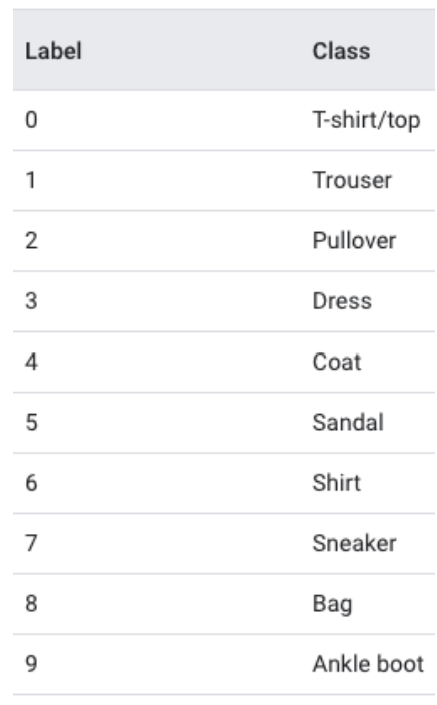

Creamos un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST:

In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
#print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.13.0


In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS Fashion_MNIST EN KERAS
# fashion-mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).

Echamos un vistazo a los **datos de entrenamiento**:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Utilizamos 60000 imágenes de entramiento de 28*28 píxeles.

In [ ]:
print(test_images.shape)

(10000, 28, 28)


En las imágenes de test, tenemos 10000 imágenes de 28*28 píxeles.

In [ ]:
# Vemos la matriz de la imagen número 20.000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

La imagen anterior corresponde con la categoría 7.

In [ ]:
train_labels[20000]

7

Veamos el elemento 20000 de las imágenes de entrenamiento y pintémoslo con matplotlib

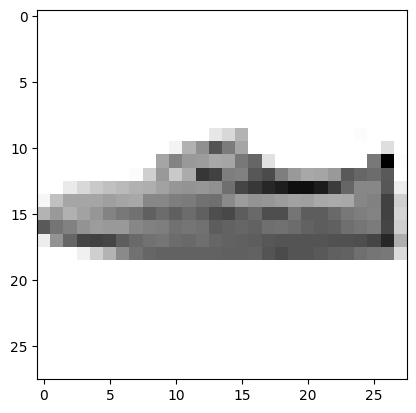

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[40000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Veamos el elemento 1  y pintémoslo con matplotlib.

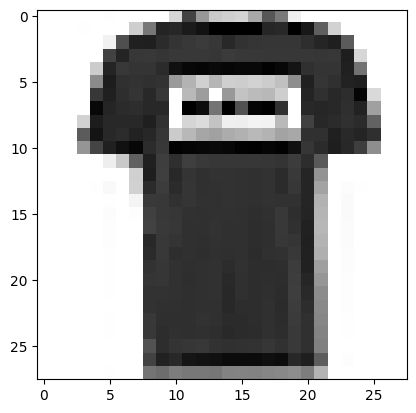

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que el elemento 1 es una camiseta.

Los **datos de prueba**:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

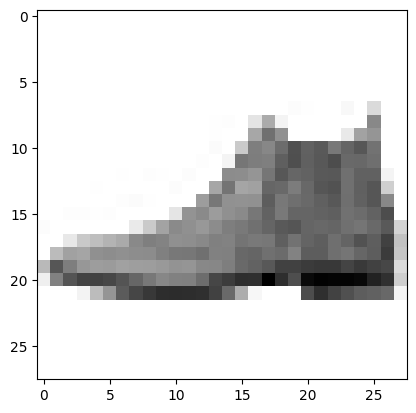

In [ ]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Primero normalizamos los datos para poder entrenar nuestra red neuronal.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Codificamos categóricamente las etiquetas. Para ello, usaremos el one-hot encoding.

En este caso transformaremos el vector en un vector de 10 ceros con un 1 en la posición que corresponda a la etiqueta.

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
#En el caso de la etiqueta 20000 ( que sabemos que era de la categoría 7) obtendríamos:
train_labels[20000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Caso 1


In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
network = models.Sequential()

network.add(layers.flatten(input_shape=(28,28)))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

AttributeError: ignored

In [ ]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Entrenamos la red

In [ ]:
history=network.fit(train_images, train_labels, epochs=5)

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
# Veamos el elemento 5 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# graficamos los 10 primeros elementos para ver cómo de bien o de mal se comporta nuestro modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 2

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network2 = models.Sequential()
network2.add(layers.flatten(input_shape=(28,28)))
network2.add(layers.Dense(10, activation='relu'))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

In [ ]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history=network2.fit(train_images, train_labels, epochs=5)

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

## Caso  2 con 25 épocas

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network3 = models.Sequential()
network3.add(layers.flatten(input_shape=(28,28)))
network3.add(layers.Dense(10, activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

In [ ]:
network3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history=network3.fit(train_images, train_labels, epochs=25)

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network3.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 3

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network4 = models.Sequential()
network4.add(layers.flatten(input_shape=(28,28)))
network4.add(layers.Dense(10, activation='sigmoid'))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

In [ ]:
network4.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history=network4.fit(train_images, train_labels, epochs=5)

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network4.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 4

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network5 = models.Sequential()
network5.add(layers.flatten(input_shape=(28,28)))
network5.add(layers.Dense(10, activation='sigmoid'))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

In [ ]:
network5.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

ENTRENAMOS LA RED


In [ ]:
history=network.fit(train_images, train_labels, epochs=5)

In [ ]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
# Veamos el elemento 5 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 5

# Caso 6

In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network7 = models.Sequential()
network7.add(layers.flatten(input_shape=(28,28)))
network7.add(layers.Dense(512, activation='relu'))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()


network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network7.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 7

In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network8 = models.Sequential()
network8.add(layers.flatten(input_shape=(28,28)))
network8.add(layers.Dense(512, activation='sigmoid'))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()


network8.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network8.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

## Caso con 7 con 25 épocas

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network9 = models.Sequential()
network9.add(layers.flatten(input_shape=(28,28)))
network9.add(layers.Dense(10, activation='relu'))
network9.add(layers.Dense(10, activation='softmax'))
network9.summary()

network9.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history=network9.fit(train_images, train_labels, epochs=25)

#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network9.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

# Caso 8

In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
network10 = models.Sequential()
network10.add(layers.flatten(input_shape=(28,28)))
network10.add(layers.Dense(512, activation='sigmoid'))
network10.add(layers.Dense(10, activation='softmax'))
network10.summary()


network10.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network10.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()